In [6]:
%matplotlib inline

In [18]:
from astropy.cosmology import Planck15
zarr = np.linspace(10, 0, 1000)
tarr = Planck15.age(zarr).value
logt = np.log10(tarr)
logt0 = np.log10(Planck15.age(0).value)

## Median halo mass evolution

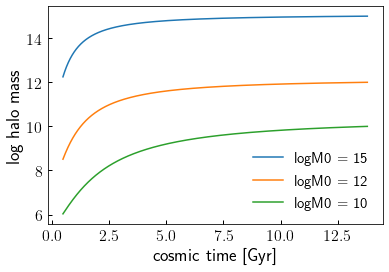

In [17]:
from diffmah.sigmoid_mah import median_logmpeak_from_logt

logmah10 = median_logmpeak_from_logt(logt, 10)
logmah12 = median_logmpeak_from_logt(logt, 12)
logmah15 = median_logmpeak_from_logt(logt, 15)

fig, ax = plt.subplots(1, 1)
__=ax.plot(10**logt, logmah15, label='logM0 = 15')
__=ax.plot(10**logt, logmah12, label='logM0 = 12')
__=ax.plot(10**logt, logmah10, label='logM0 = 10')
leg = ax.legend()
xlabel = ax.set_xlabel('cosmic time [Gyr]')
ylabel = ax.set_ylabel('log halo mass')


## Variation in halo mass evolution

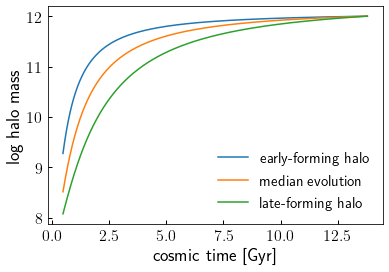

In [19]:
from diffmah.sigmoid_mah import logmpeak_from_logt, _median_mah_sigmoid_params

logtc_med12, k_med12, dlogm_height_med12 = _median_mah_sigmoid_params(12)

logmah_early = logmpeak_from_logt(
    logt, logtc_med12-0.25, k_med12, dlogm_height_med12, 12, logt0)
logmah_med = logmpeak_from_logt(
    logt, logtc_med12, k_med12, dlogm_height_med12, 12, logt0)
logmah_late = logmpeak_from_logt(
    logt, logtc_med12+0.25, k_med12, dlogm_height_med12, 12, logt0)

fig, ax = plt.subplots(1, 1)
__=ax.plot(10**logt, logmah_early, label='early-forming halo')
__=ax.plot(10**logt, logmah_med, label='median evolution')
__=ax.plot(10**logt, logmah_late, label='late-forming halo')
leg = ax.legend()
xlabel = ax.set_xlabel('cosmic time [Gyr]')
ylabel = ax.set_ylabel('log halo mass')


## Main Sequence Star Formation History for halos of median growth

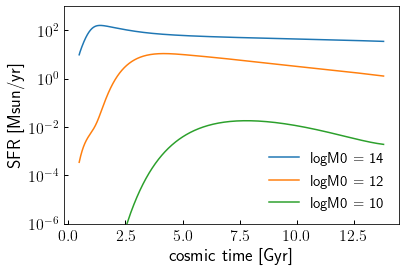

In [32]:
from diffmah.main_sequence import main_sequence_sfr_median_halo_growth

sfh10 = main_sequence_sfr_median_halo_growth(10, zarr, tarr)
sfh12 = main_sequence_sfr_median_halo_growth(12, zarr, tarr)
sfh14 = main_sequence_sfr_median_halo_growth(14, zarr, tarr)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(1e-6, 1000)
yscale = ax.set_yscale('log')
__=ax.plot(tarr, sfh14, label='logM0 = 14')
__=ax.plot(tarr, sfh12, label='logM0 = 12')
__=ax.plot(tarr, sfh10, label='logM0 = 10')

leg = ax.legend()
xlabel = ax.set_xlabel('cosmic time [Gyr]')
ylabel = ax.set_ylabel('SFR [Msun/yr]')
